   mtDNA cn  telomere     miR-21    miR-92  Heart Failure /control
0  0.596967   0.378531  0.025609  0.009897                       1
1  0.844692   0.056497  0.033729  0.293349                       1
2  0.411931   0.429379  0.492505  1.000000                       1
3  0.324368   0.242938  1.000000  0.008709                       1
4  0.274621   0.316384  0.188320  0.529295                       1

==== Logistic Regression ====
Coefficients: [ 1.36248949 -0.76825605  0.55813399  0.39004026]
MSE: 0.3333333333333333, Accuracy: 0.6666666666666666, Precision: 1.0, Recall: 0.3333333333333333
Confusion Matrix:
[[3 0]
 [2 1]]

==== Random Forest ====
Feature Importance: [0.43711461 0.25898843 0.14354925 0.16034771]
MSE: 0.16666666666666666, Accuracy: 0.8333333333333334, Precision: 1.0, Recall: 0.6666666666666666
Confusion Matrix:
[[3 0]
 [1 2]]

==== Gradient Boosting ====
Feature Importance: [0.5533595  0.30778665 0.0412293  0.09762455]
MSE: 0.16666666666666666, Accuracy: 0.8333333333333334

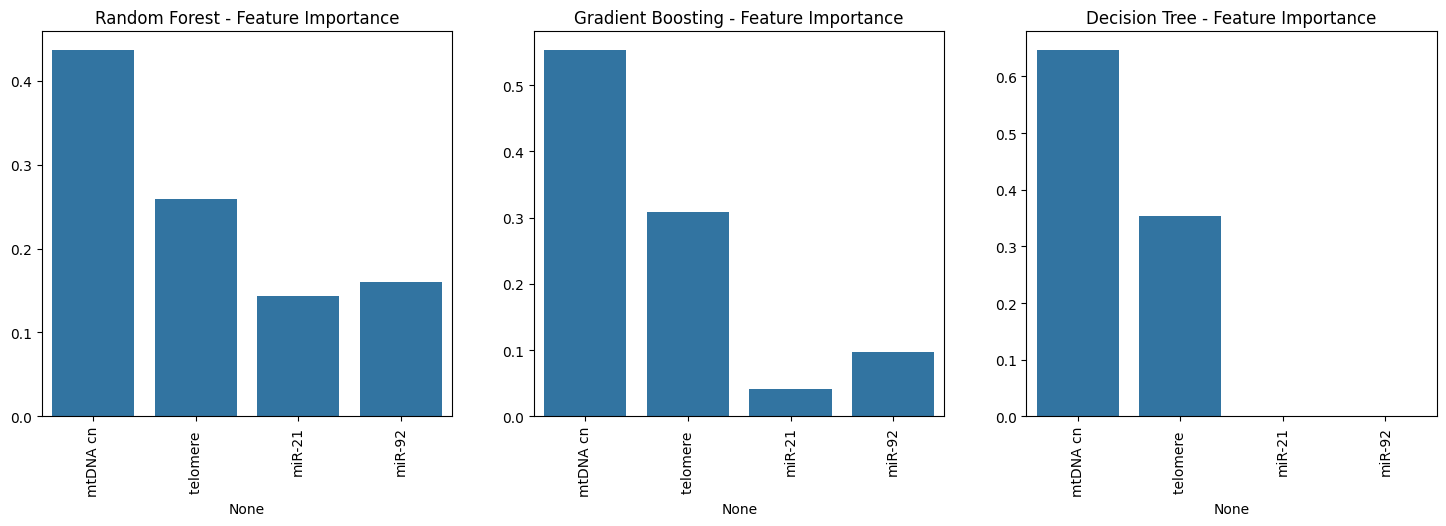

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error
)

data = r"C:\Users\behsh\Desktop\CARDEA\tetrad new data python\mtDNA\transformed_data0 MtDNA.xlsx"
# Load the Excel file" 
df = pd.read_excel( data )
print(df.head())
X = df.drop(columns=['Heart Failure /control'])  
y = df['Heart Failure /control']    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42, stratify=y)   


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 1️⃣ Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)


mse_log = mean_squared_error(y_test, y_pred_log)
acc_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
conf_matrix_log = confusion_matrix(y_test, y_pred_log)

log_coeff = log_model.coef_[0]

### 2️⃣ Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
acc_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Feature Importance
rf_importances = rf_model.feature_importances_

### 3️⃣ Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
acc_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

# Feature Importance
gb_importances = gb_model.feature_importances_

### 4️⃣ Decision Tree
dt_model = DecisionTreeClassifier(max_depth=3, min_samples_split=5, min_samples_leaf=3, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
acc_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Feature Importance
dt_importances = dt_model.feature_importances_

print("\n==== Logistic Regression ====")
print(f"Coefficients: {log_coeff}")
print(f"MSE: {mse_log}, Accuracy: {acc_log}, Precision: {precision_log}, Recall: {recall_log}")
print(f"Confusion Matrix:\n{conf_matrix_log}")

print("\n==== Random Forest ====")
print(f"Feature Importance: {rf_importances}")
print(f"MSE: {mse_rf}, Accuracy: {acc_rf}, Precision: {precision_rf}, Recall: {recall_rf}")
print(f"Confusion Matrix:\n{conf_matrix_rf}")

print("\n==== Gradient Boosting ====")
print(f"Feature Importance: {gb_importances}")
print(f"MSE: {mse_gb}, Accuracy: {acc_gb}, Precision: {precision_gb}, Recall: {recall_gb}")
print(f"Confusion Matrix:\n{conf_matrix_gb}")

print("\n==== Decision Tree ====")
print(f"Feature Importance: {dt_importances}")
print(f"MSE: {mse_dt}, Accuracy: {acc_dt}, Precision: {precision_dt}, Recall: {recall_dt}")
print(f"Confusion Matrix:\n{conf_matrix_dt}")


plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.barplot(x=X.columns, y=rf_importances)
plt.xticks(rotation=90)
plt.title("Random Forest - Feature Importance")


plt.subplot(1, 3, 2)
sns.barplot(x=X.columns, y=gb_importances)
plt.xticks(rotation=90)
plt.title("Gradient Boosting - Feature Importance")

plt.subplot(1, 3, 3)
sns.barplot(x=X.columns, y=dt_importances)
plt.xticks(rotation=90)
plt.title("Decision Tree - Feature Importance")

plt.show()


In [3]:
from scipy.stats import poisson, kstest
import numpy as np
lambda_ = np.mean (df)

statistic, p_value = kstest(df, 'poisson', args=(lambda_,))

print(f"KS Statistic: {statistic}, p-value: {p_value}")

# why my code is not following poission

KS Statistic: [0.76799926 0.76799926 0.76799926 0.76799926 0.76799926], p-value: [1.94877909e-18 1.94877909e-18 1.94877909e-18 1.94877909e-18
 1.94877909e-18]


In [4]:
import shap


In [5]:
#best parameters for model
from sklearn.model_selection import GridSearchCV

param_grid_log = {
    'C': [ 0.1, 1,5,7, 10],  # قدرت منظم‌سازی
    'penalty': ['l1', 'l2'],  # نوع منظم‌سازی (Lasso / Ridge)
    'solver': ['liblinear', 'saga']
}

log_grid = GridSearchCV(LogisticRegression(), param_grid_log, cv=5, scoring='accuracy', n_jobs=-1)
log_grid.fit(X_train_scaled, y_train)

print("Best Params for Logistic Regression:", log_grid.best_params_)
print("Best Score:", log_grid.best_score_)

#random forest
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist_rf = {
    'n_estimators': [70, 100, 150],
    'max_depth': [None,1,2,3, 5],
    'min_samples_split': [ 5, 10,15],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2']
}

rf_random = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_dist_rf, 
                               n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
rf_random.fit(X_train, y_train)

print("Best Params for Random Forest:", rf_random.best_params_)
print("Best Score:", rf_random.best_score_)

#gradient boosting
param_grid_gb = {
    'n_estimators': [10, 20, 25, 50, 100, 200],  # None حذف شد
    'learning_rate': [0.001, 0.01, 0.015, 0.02, 0.1],  # 0 حذف شد
    'max_depth': [1, 2, 3]
}


gb_grid = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, 
                       cv=5, scoring='accuracy', n_jobs=-1)
gb_grid.fit(X_train, y_train)

print("Best Params for Gradient Boosting:", gb_grid.best_params_)
print("Best Score:", gb_grid.best_score_)


Best Params for Logistic Regression: {'C': 5, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.9099999999999999
Best Params for Random Forest: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 2}
Best Score: 0.8300000000000001
Best Params for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 200}
Best Score: 0.8300000000000001


In [6]:
best_log_model = LogisticRegression(C=5, penalty='l1', solver='liblinear')
best_log_model.fit(X_train_scaled, y_train)
y_pred_log_best = best_log_model.predict(X_test_scaled)

acc_log_best = accuracy_score(y_test, y_pred_log_best)
precision_log_best = precision_score(y_test, y_pred_log_best)
recall_log_best = recall_score(y_test, y_pred_log_best)
conf_matrix_log_best = confusion_matrix(y_test, y_pred_log_best)

print("\n==== Optimized Logistic Regression ====")
print(f"Accuracy: {acc_log_best}, Precision: {precision_log_best}, Recall: {recall_log_best}")
print(f"Confusion Matrix:\n{conf_matrix_log_best}")

best_rf_model = RandomForestClassifier(
    n_estimators=150, min_samples_split=5, min_samples_leaf=1,
    max_features='log2', max_depth=2, random_state=42
)
best_rf_model.fit(X_train, y_train)
y_pred_rf_best = best_rf_model.predict(X_test)

acc_rf_best = accuracy_score(y_test, y_pred_rf_best)
precision_rf_best = precision_score(y_test, y_pred_rf_best)
recall_rf_best = recall_score(y_test, y_pred_rf_best)
conf_matrix_rf_best = confusion_matrix(y_test, y_pred_rf_best)

print("\n==== Optimized Random Forest ====")
print(f"Accuracy: {acc_rf_best}, Precision: {precision_rf_best}, Recall: {recall_rf_best}")
print(f"Confusion Matrix:\n{conf_matrix_rf_best}")


best_gb_model = GradientBoostingClassifier(
    learning_rate=0.01, max_depth=1, n_estimators=200, random_state=42
)
best_gb_model.fit(X_train, y_train)
y_pred_gb_best = best_gb_model.predict(X_test)

acc_gb_best = accuracy_score(y_test, y_pred_gb_best)
precision_gb_best = precision_score(y_test, y_pred_gb_best)
recall_gb_best = recall_score(y_test, y_pred_gb_best)
conf_matrix_gb_best = confusion_matrix(y_test, y_pred_gb_best)

print("\n==== Optimized Gradient Boosting ====")
print(f"Accuracy: {acc_gb_best}, Precision: {precision_gb_best}, Recall: {recall_gb_best}")
print(f"Confusion Matrix:\n{conf_matrix_gb_best}")




==== Optimized Logistic Regression ====
Accuracy: 0.8333333333333334, Precision: 1.0, Recall: 0.6666666666666666
Confusion Matrix:
[[3 0]
 [1 2]]

==== Optimized Random Forest ====
Accuracy: 0.8333333333333334, Precision: 1.0, Recall: 0.6666666666666666
Confusion Matrix:
[[3 0]
 [1 2]]

==== Optimized Gradient Boosting ====
Accuracy: 0.8333333333333334, Precision: 1.0, Recall: 0.6666666666666666
Confusion Matrix:
[[3 0]
 [1 2]]


In [7]:
# Cross-Validation
cv_folds = 5

### 1️ Logistic Regression
log_scores = cross_val_score(best_log_model, X_train_scaled, y_train, cv=cv_folds, scoring='accuracy')
### 2️ Random Forest
rf_scores = cross_val_score(best_rf_model, X_train, y_train, cv=cv_folds, scoring='accuracy')
### 3️ Gradient Boosting
gb_scores = cross_val_score(best_gb_model, X_train, y_train, cv=cv_folds, scoring='accuracy')

print("\n==== Cross-Validation Scores ====")
print(f"Logistic Regression: Mean={log_scores.mean():.4f}, Std={log_scores.std():.4f}")
print(f"Random Forest: Mean={rf_scores.mean():.4f}, Std={rf_scores.std():.4f}")
print(f"Gradient Boosting: Mean={gb_scores.mean():.4f}, Std={gb_scores.std():.4f}")


#mean: accuracy 


==== Cross-Validation Scores ====
Logistic Regression: Mean=0.9100, Std=0.1114
Random Forest: Mean=0.8300, Std=0.0872
Gradient Boosting: Mean=0.8300, Std=0.0872


SHAP Values for Logistic Regression


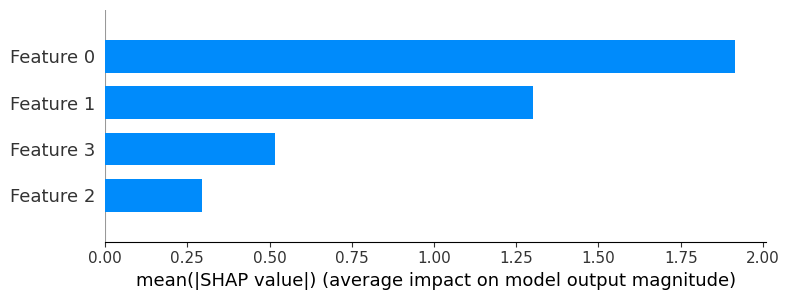

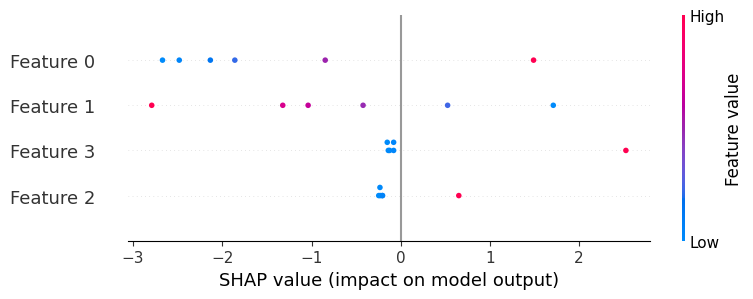

SHAP Values for  Gradient Boosting


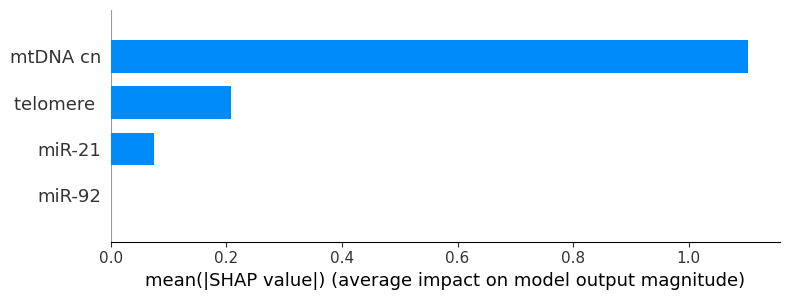

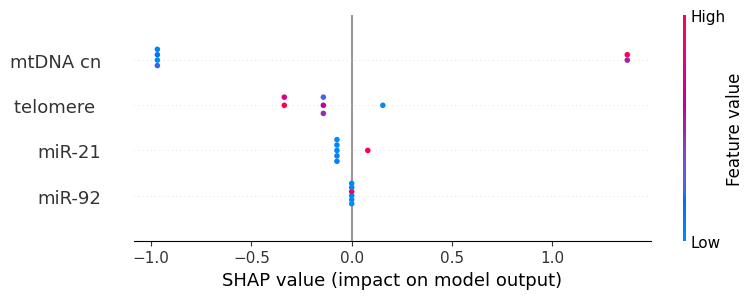

Plotting SHAP dependence for feature: mtDNA cn


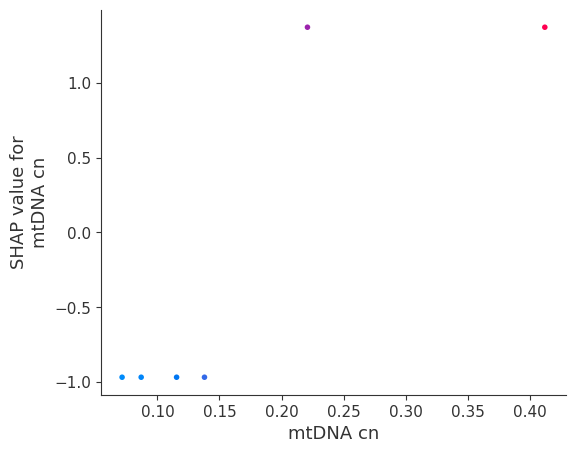

Plotting SHAP dependence for feature: telomere 


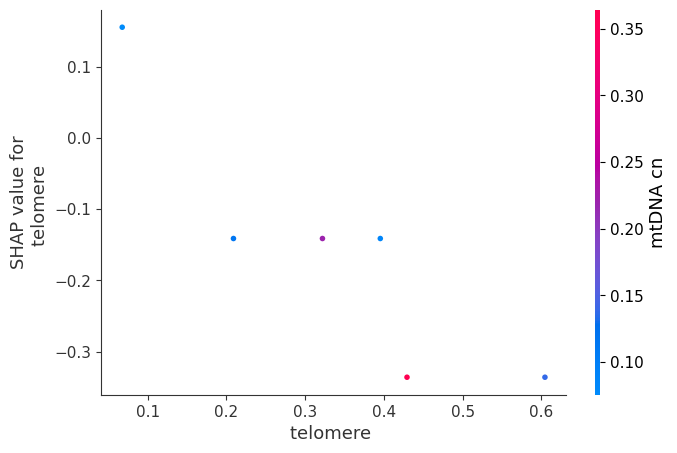

Plotting SHAP dependence for feature: miR-21


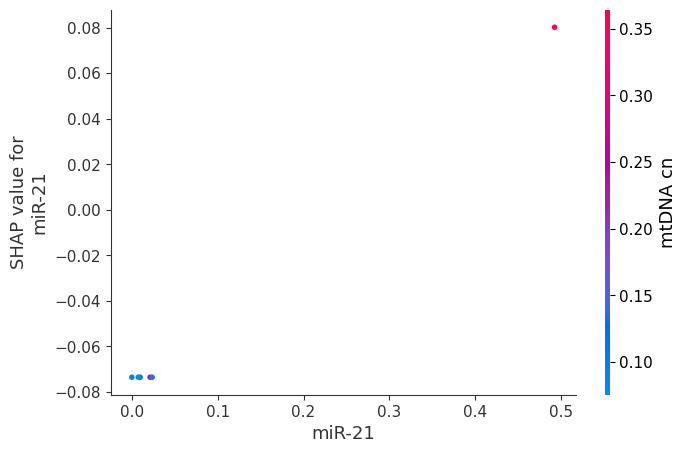

Plotting SHAP dependence for feature: miR-92


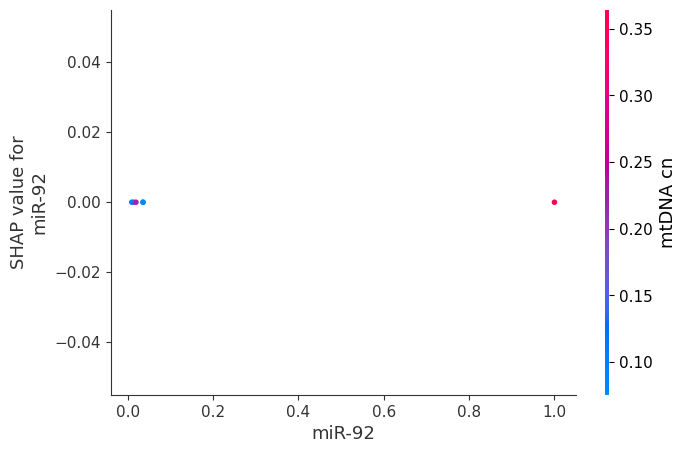

In [8]:
#shap
print('SHAP Values for Logistic Regression')
explainer_log = shap.Explainer(best_log_model, X_train_scaled)
shap_values_log = explainer_log(X_test_scaled)
shap.summary_plot(shap_values_log, X_test, plot_type="bar")
shap.summary_plot(shap_values_log, X_test)


print('SHAP Values for  Gradient Boosting')
explainer_gb = shap.Explainer(best_gb_model, X_train)
shap_values_gb = explainer_gb(X_test)
shap.summary_plot(shap_values_gb, X_test, plot_type="bar")
shap.summary_plot(shap_values_gb, X_test)


for feature in X.columns:
    print(f"Plotting SHAP dependence for feature: {feature}")
    shap.dependence_plot(feature, shap_values_gb.values, X_test, feature_names=X.columns)



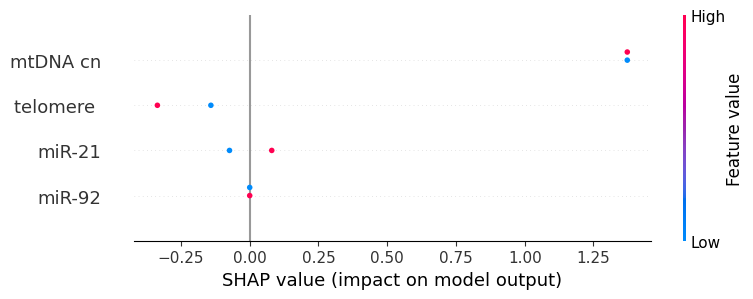

In [9]:
#for limiting to number of feature
X_test_sample = X_test[X_test['mtDNA cn'] > 0.2] 
shap_values = explainer_gb(X_test_sample)
shap.summary_plot(shap_values, X_test_sample)


In [10]:
#new patient

feature_names = ['mtDNA cn'	,'telomere ', 	'miR-21',	'miR-92'] 
new_patient = np.array([[ '0.113447927'	,'1'	,'0.012179888'	,'0.032066508']])
new_patient_df = pd.DataFrame(new_patient, columns=feature_names)
new_patient_scaled = scaler.transform(new_patient_df)

#probability for each model
prob_log = best_log_model.predict_proba(new_patient_scaled)[:, 1]  
prob_rf = best_rf_model.predict_proba(new_patient_df)[:, 1]
prob_gb = best_gb_model.predict_proba(new_patient_df)[:, 1]
prob_dt = dt_model.predict_proba(new_patient_df)[:, 1]


print(f"🔹 Logistic Regression - Probability of getting HfpEf: {prob_log[0]:.4f}")
print(f"🔹 Random Forest - Probability of getting HfpEf: {prob_rf[0]:.4f}")
print(f"🔹 Gradient Boosting - Probability of getting HfpEf: {prob_gb[0]:.4f}")
print(f"🔹 Decision Tree - Probability of getting HfpEf: {prob_dt[0]:.4f}")

# threshold
threshold = 0.5
pred_log = (prob_log >= threshold).astype(int)
print(f'===🔹 Logistic Regression - final result ------> {'heart failure' if pred_log[0] == 1 else 'healthy'}')
print(f'===🔹 Random Forest - final result ------> {'heart failure' if pred_log[0] == 1 else 'healthy'}')
print(f"===🔹 Gradient Boosting - final result ------> {'heart failure' if pred_log[0] == 1 else 'healthy'}")
print(f"===🔹 Decision Tree - final result ------> {'heart failure' if pred_log[0] == 1 else 'healthy'}")


🔹 Logistic Regression - Probability of getting HfpEf: 0.0007
🔹 Random Forest - Probability of getting HfpEf: 0.1069
🔹 Gradient Boosting - Probability of getting HfpEf: 0.2684
🔹 Decision Tree - Probability of getting HfpEf: 0.0000
===🔹 Logistic Regression - final result ------> healthy
===🔹 Random Forest - final result ------> healthy
===🔹 Gradient Boosting - final result ------> healthy
===🔹 Decision Tree - final result ------> healthy



==== Logistic Regression ====
Coefficients: [ 3.52587675 -1.7049855   0.39636211  0.32500677]
MSE: 0.16666666666666666, Accuracy: 0.8333333333333334, Precision: 1.0, Recall: 0.6666666666666666
Confusion Matrix:
[[3 0]
 [1 2]]

==== Random Forest ====
Feature Importance: [0.47852218 0.2290281  0.1823322  0.11011752]
MSE: 0.16666666666666666, Accuracy: 0.8333333333333334, Precision: 1.0, Recall: 0.6666666666666666
Confusion Matrix:
[[3 0]
 [1 2]]

==== Gradient Boosting ====
Feature Importance: [0.75398622 0.22044339 0.02557039 0.        ]
MSE: 0.16666666666666666, Accuracy: 0.8333333333333334, Precision: 1.0, Recall: 0.6666666666666666
Confusion Matrix:
[[3 0]
 [1 2]]


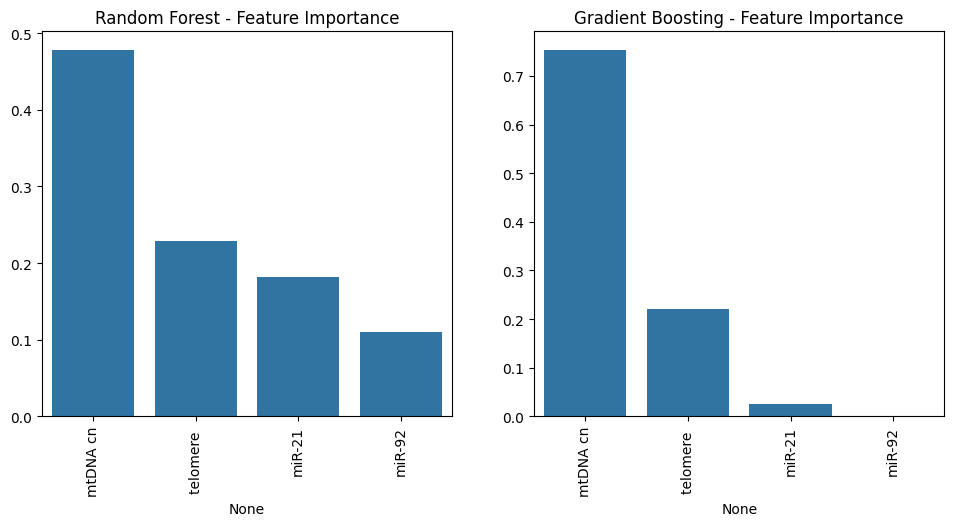

In [11]:
### 1 Logistic Regression
y_pred_Bestlog = best_log_model.predict(X_test_scaled)
BEST_mse_log = mean_squared_error(y_test, y_pred_Bestlog)
BEST_acc_log = accuracy_score(y_test, y_pred_Bestlog)
BEST_precision_log = precision_score(y_test, y_pred_Bestlog)
BEST_recall_log = recall_score(y_test, y_pred_Bestlog)
BEST_conf_matrix_log = confusion_matrix(y_test, y_pred_Bestlog)

BEST_log_coeff = best_log_model.coef_[0]

### 2 Random Forest
y_pred_Best_rf = best_rf_model.predict(X_test)
BEST_mse_rf = mean_squared_error(y_test, y_pred_Best_rf)
BEST_acc_rf = accuracy_score(y_test, y_pred_Best_rf)
BEST_precision_rf = precision_score(y_test, y_pred_Best_rf)
BEST_recall_rf = recall_score(y_test, y_pred_Best_rf)
BEST_conf_matrix_rf = confusion_matrix(y_test, y_pred_Best_rf)

# Feature Importance
BEST_rf_importances = best_rf_model.feature_importances_

### 3️⃣ Gradient Boosting
y_pred_Best_gb = best_gb_model.predict(X_test)

BEST_mse_gb = mean_squared_error(y_test, y_pred_Best_gb)
BEST_acc_gb = accuracy_score(y_test, y_pred_Best_gb)
BEST_precision_gb = precision_score(y_test, y_pred_Best_gb)
BEST_recall_gb = recall_score(y_test, y_pred_Best_gb)
BEST_conf_matrix_gb = confusion_matrix(y_test, y_pred_Best_gb)

# Feature Importance
BEST_gb_importances = best_gb_model.feature_importances_


print("\n==== Logistic Regression ====")
print(f"Coefficients: {BEST_log_coeff}")
print(f"MSE: {BEST_mse_log}, Accuracy: {BEST_acc_log}, Precision: {BEST_precision_log}, Recall: {BEST_recall_log}")
print(f"Confusion Matrix:\n{BEST_conf_matrix_log}")

print("\n==== Random Forest ====")
print(f"Feature Importance: {BEST_rf_importances}")
print(f"MSE: {BEST_mse_rf}, Accuracy: {BEST_acc_rf}, Precision: {BEST_precision_rf}, Recall: {BEST_recall_rf}")
print(f"Confusion Matrix:\n{conf_matrix_rf}")

print("\n==== Gradient Boosting ====")
print(f"Feature Importance: {BEST_gb_importances}")
print(f"MSE: {BEST_mse_gb}, Accuracy: {BEST_acc_gb}, Precision: {BEST_precision_gb}, Recall: {BEST_recall_gb}")
print(f"Confusion Matrix:\n{BEST_conf_matrix_gb}")


plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.barplot(x=X.columns, y=BEST_rf_importances)
plt.xticks(rotation=90)
plt.title("Random Forest - Feature Importance")


plt.subplot(1, 3, 2)
sns.barplot(x=X.columns, y=BEST_gb_importances)
plt.xticks(rotation=90)
plt.title("Gradient Boosting - Feature Importance")


plt.show()